In [106]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity


In [6]:
%pwd

'f:\\Final_project\\Book_Recommender_System\\notebook'

In [7]:
import os
os.chdir("../")

In [ ]:
##Reading the datasets
books = pd.read_csv(r"F:\Final_project\Book_Recommender_System\notebook\data\books.csv",sep=';',on_bad_lines='skip',encoding='latin-1')
users = pd.read_csv(r"F:\Final_project\Book_Recommender_System\notebook\data\users.csv",sep=';',on_bad_lines='skip',encoding='latin-1')
ratings= pd.read_csv(r"F:\Final_project\Book_Recommender_System\notebook\data\ratings.csv",sep=';',on_bad_lines='skip',encoding='latin-1')


C:\Users\asus\AppData\Local\Temp\ipykernel_16832\3358163940.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(r"F:\Final_project\Book_Recommender_System\artifacts\dataset\ingested_data\books_data\books.csv",sep=';',on_bad_lines='skip',encoding='latin-1')


In [24]:
print(f"Shape of books dataset: {books.shape}")
print(f"Shape of users dataset : {users.shape}")
print(f"Shape of ratings dataset: {ratings.shape}")

Shape of books dataset: (271360, 8)
Shape of users dataset : (278858, 3)
Shape of ratings dataset: (1149780, 3)


In [25]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [26]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [27]:
books.rename(columns={'ISBN':'isbn','Book-Title':'title','Book-Author':'author',
                      'Year-Of-Publication':'year','Publisher':'publisher','Image-URL-L':'image_url'},inplace=True)

In [28]:
books = books[['isbn','title','author','year','publisher','image_url']]

In [29]:
books.head()

,isbn,title,author,year,publisher,image_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [30]:
books.columns

Index(['isbn', 'title', 'author', 'year', 'publisher', 'image_url'], dtype='object')

In [31]:
users.tail()

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [32]:
ratings.head()
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [33]:
ratings.rename(columns={'User-ID':'user_id',
                        'ISBN':'isbn','Book-Rating':'rating'},inplace=True)

In [34]:
ratings_with_books = ratings.merge(books,on='isbn')

In [35]:
ratings_with_books.head()

,user_id,isbn,rating,title,author,year,publisher,image_url
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...


In [36]:
number_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()

In [37]:
number_rating

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [38]:
number_rating.rename(columns={'rating':'num_of_rating'},inplace=True)

In [39]:
number_rating

,title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [40]:
final_rating = ratings_with_books.merge(number_rating,on='title')

In [41]:
final_rating.head()

,user_id,isbn,rating,title,author,year,publisher,image_url,num_of_rating
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,60
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,14
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,650
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,1
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,1


In [42]:
##lets take those books which got atleast 50 rating of user
final_rating = final_rating[final_rating['num_of_rating']>=50]

In [43]:
final_rating.head()

,user_id,isbn,rating,title,author,year,publisher,image_url,num_of_rating
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,60
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,650
6,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,838
7,276746,0425115801,0,Lightning,Dean R. Koontz,1996,Berkley Publishing Group,http://images.amazon.com/images/P/0425115801.0...,274
8,276746,0449006522,0,Manhattan Hunt Club,JOHN SAUL,2002,Ballantine Books,http://images.amazon.com/images/P/0449006522.0...,111


In [44]:
## lets drop the duplicates 
final_rating.drop_duplicates(['user_id','title'],inplace=True)

In [45]:
final_rating.isnull().sum()

user_id          0
isbn             0
rating           0
title            0
author           0
year             0
publisher        0
image_url        0
num_of_rating    0
dtype: int64

In [46]:
##creating the pivot table
book_pivot  =final_rating.pivot_table(columns='user_id',index='title',values='rating')

In [47]:
book_pivot.head()


user_id,8,9,14,16,17,19,23,26,32,39,...,278820,278824,278828,278832,278836,278843,278844,278846,278851,278854
title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16 Lighthouse Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010: Odyssey Two,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
book_pivot.fillna(0,inplace=True)

In [49]:
book_pivot.head()

user_id,8,9,14,16,17,19,23,26,32,39,...,278820,278824,278828,278832,278836,278843,278844,278846,278851,278854
title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
from scipy.sparse import csr_matrix

In [51]:
book_sparse = csr_matrix(book_pivot)

In [52]:
book_sparse

<2444x47994 sparse matrix of type '<class 'numpy.float64'>'
	with 113483 stored elements in Compressed Sparse Row format>

In [53]:
from sklearn.neighbors import NearestNeighbors

In [54]:
model = NearestNeighbors(algorithm='brute')

In [55]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [56]:
model.get_params()

{'algorithm': 'brute',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'radius': 1.0}

In [57]:
book_pivot.iloc[237,:]

user_id
8         0.0
9         6.0
14        0.0
16        0.0
17        0.0
         ... 
278843    0.0
278844    0.0
278846    0.0
278851    0.0
278854    0.0
Name: Beloved (Plume Contemporary Fiction), Length: 47994, dtype: float64

In [58]:
distance ,suggestion = model.kneighbors(book_pivot.iloc[2327,:].values.reshape(1,-1),n_neighbors=6)

In [59]:
distance

array([[ 0.        , 59.26212956, 59.81638571, 59.83310121, 60.08327554,
        60.17474553]])

In [60]:
suggestion

array([[2327,   65, 1713,  770, 1053,  284]])

In [61]:
for i in range(len(suggestion)):
    print(book_pivot.index[suggestion[i]])

Index(['Unspeakable', 'A Secret Affair', 'The Blooding',
       'Ground Zero and Beyond', 'Lovers',
       'Blood and Gold (Rice, Anne, Vampire Chronicles.)'],
      dtype='object', name='title')


In [62]:
#keeping the book names 
book_name = book_pivot.index

In [63]:
book_name[5]

'204 Rosewood Lane'

In [64]:
final_rating.head()

,user_id,isbn,rating,title,author,year,publisher,image_url,num_of_rating
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,60
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,650
6,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,838
7,276746,0425115801,0,Lightning,Dean R. Koontz,1996,Berkley Publishing Group,http://images.amazon.com/images/P/0425115801.0...,274
8,276746,0449006522,0,Manhattan Hunt Club,JOHN SAUL,2002,Ballantine Books,http://images.amazon.com/images/P/0449006522.0...,111


In [65]:
np.where(book_pivot.index == '204 Rosewood Lane')[0][0]

np.int64(5)

In [66]:
ids = np.where(final_rating['title'] == '204 Rosewood Lane')[0][0]

In [67]:
ids

np.int64(997)

In [68]:
final_rating.iloc[ids]['image_url']

'http://images.amazon.com/images/P/1551669293.01.LZZZZZZZ.jpg'

In [69]:
book_name  = []
for book_id in suggestion:
    book_name.append(book_pivot.index[book_id])

In [70]:
book_name

[Index(['Unspeakable', 'A Secret Affair', 'The Blooding',
        'Ground Zero and Beyond', 'Lovers',
        'Blood and Gold (Rice, Anne, Vampire Chronicles.)'],
       dtype='object', name='title')]

In [71]:
ids_index = []
for name in book_name[0]:
    ids = np.where(final_rating['title'] == name)[0][0]
    ids_index.append(ids)

In [72]:
ids_index

[np.int64(349),
 np.int64(2774),
 np.int64(5045),
 np.int64(13605),
 np.int64(12948),
 np.int64(7971)]

In [73]:
for idx in ids_index:
    url = final_rating.iloc[idx]['image_url']
    print(url)

http://images.amazon.com/images/P/0446607193.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0061012289.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0553282816.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/1401088945.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/1878685031.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0345409329.01.LZZZZZZZ.jpg


In [74]:
import pickle
pickle.dump(model,open('artifacts/model.pkl','wb'))
pickle.dump(book_name,open('artifacts/book_name.pkl','wb'))
pickle.dump(final_rating,open('artifacts/final_rating.pkl','wb'))


In [75]:
final_rating

,user_id,isbn,rating,title,author,year,publisher,image_url,num_of_rating
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,60
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,650
6,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,838
7,276746,0425115801,0,Lightning,Dean R. Koontz,1996,Berkley Publishing Group,http://images.amazon.com/images/P/0425115801.0...,274
8,276746,0449006522,0,Manhattan Hunt Club,JOHN SAUL,2002,Ballantine Books,http://images.amazon.com/images/P/0449006522.0...,111
...,...,...,...,...,...,...,...,...,...
1031123,276704,0441007813,0,Obsidian Butterfly,Laurell K. Hamilton,2000,Ace Books,http://images.amazon.com/images/P/0441007813.0...,53
1031124,276704,0446353957,0,Mirror Image,Sandra Brown,1990,Warner Books,http://images.amazon.com/images/P/0446353957.0...,159
1031125,276704,0446605409,0,Plum Island,Nelson DeMille,1998,Warner Books,http://images.amazon.com/images/P/0446605409.0...,150
1031128,276704,0743211383,7,Dreamcatcher,Stephen King,2001,Scribner,http://images.amazon.com/images/P/0743211383.0...,481


In [76]:
def recommend_book(book_name):
    book_id = np.where(book_pivot.index == book_name)[0][0]
    distance,suggestion = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1),n_neighbors=6)

    for i in range(len(suggestion)):
        books = book_pivot.index[suggestion[i]]
        for j in books:
            if j == book_name:
                print(f"You searched '{book_name}'\n")
                print("The suggested books are : \n")
            else:
                print(j)


In [77]:
recommend_book('The Notebook')

You searched 'The Notebook'

The suggested books are : 

A Secret Affair
Creed for the Third Millennium
Lovers
Women in His Life
The Juror


In [ ]:
#Similarity Matrix (Cosine Similarity)
book_similarity = cosine_similarity(book_sparse)

## SVD (Matrix Factorization)

In [84]:

from sklearn.decomposition import TruncatedSVD
book_names = book_pivot.index.tolist()
# Apply SVD
svd = TruncatedSVD(n_components=20, random_state=42)
svd_matrix = svd.fit_transform(book_sparse)

# Recommendation based on SVD
def recommend_svd(book_name, n=5):
    if book_name not in book_names:
        print(f"'{book_name}' not found in dataset.")
        return
    idx = book_names.index(book_name)
    book_vector = svd_matrix[idx]
    similarity = cosine_similarity([book_vector], svd_matrix)[0]
    similar_books = list(enumerate(similarity))
    similar_books = sorted(similar_books, key=lambda x: x[1], reverse=True)[1:n+1]
    print(f"\n📘 SVD-based Recommendations for '{book_name}':")
    for i, score in similar_books:
        print(f"- {book_names[i]} (Score: {score:.2f})")



In [86]:
# 🧪 Try SVD-based Recommendations
recommend_svd("Harry Potter and the Sorcerer's Stone (Book 1)")



📘 SVD-based Recommendations for 'Harry Potter and the Sorcerer's Stone (Book 1)':
- Harry Potter and the Goblet of Fire (Book 4) (Score: 0.94)
- Harry Potter and the Order of the Phoenix (Book 5) (Score: 0.93)
- Harry Potter and the Prisoner of Azkaban (Book 3) (Score: 0.91)
- Harry Potter and the Chamber of Secrets (Book 2) (Score: 0.87)
- Great Expectations (Score: 0.80)


## Hybrid Model (Weighted Score)

In [87]:

# Hybrid Recommendation (average of CF and SVD similarity)
def recommend_hybrid(book_name, n=5):
    if book_name not in book_names:
        print(f"'{book_name}' not found in dataset.")
        return
    idx = book_names.index(book_name)
    sim_cf = book_similarity[idx]
    sim_svd = cosine_similarity([svd_matrix[idx]], svd_matrix)[0]
    hybrid_score = (sim_cf + sim_svd) / 2
    hybrid_books = list(enumerate(hybrid_score))
    hybrid_books = sorted(hybrid_books, key=lambda x: x[1], reverse=True)[1:n+1]
    print(f"\n🔀 Hybrid Recommendations for '{book_name}':")
    for i, score in hybrid_books:
        print(f"- {book_names[i]} (Score: {score:.2f})")


In [88]:
# 🧪 Try Hybrid Recommendations
recommend_hybrid("Harry Potter and the Sorcerer's Stone (Book 1)")


🔀 Hybrid Recommendations for 'Harry Potter and the Sorcerer's Stone (Book 1)':
- Harry Potter and the Goblet of Fire (Book 4) (Score: 0.65)
- Harry Potter and the Prisoner of Azkaban (Book 3) (Score: 0.64)
- Harry Potter and the Chamber of Secrets (Book 2) (Score: 0.63)
- Harry Potter and the Order of the Phoenix (Book 5) (Score: 0.59)
- Great Expectations (Score: 0.42)


## Visualizations

C:\Users\asus\AppData\Local\Temp\ipykernel_16832\3041778201.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_books.values, y=top_books.index, palette='viridis')


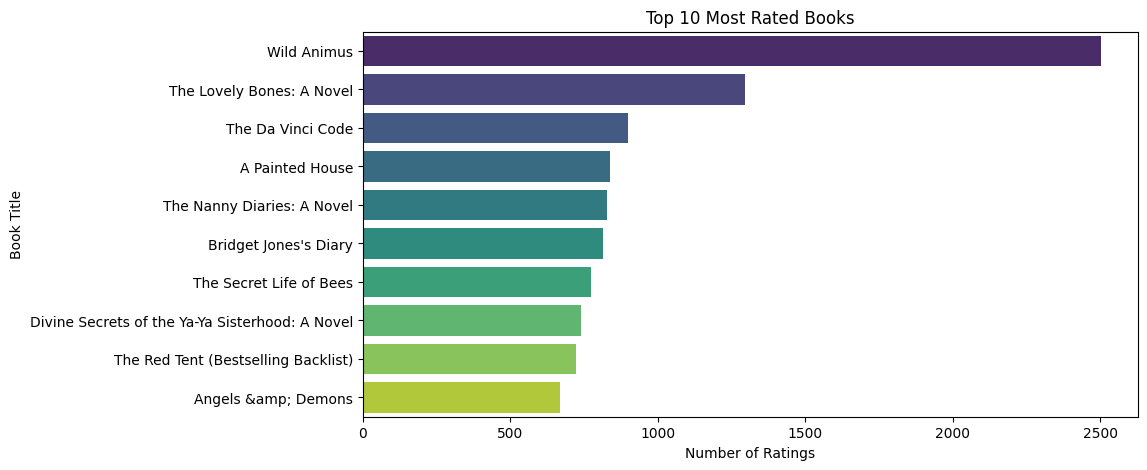

In [107]:

# Top 10 Most Rated Books
top_books = ratings_with_books['title'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_books.values, y=top_books.index, palette='viridis')
plt.title('Top 10 Most Rated Books')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.show()


C:\Users\asus\AppData\Local\Temp\ipykernel_16832\2240719518.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ratings, x='rating', palette='coolwarm')


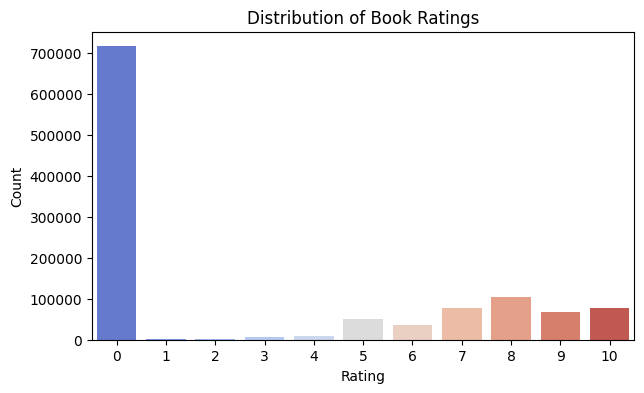

In [110]:
# Distribution of Ratings
plt.figure(figsize=(7, 4))
sns.countplot(data=ratings, x='rating', palette='coolwarm')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()
